# **Import Libraries**

In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

# **Read File**

In [206]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [207]:
cd 'drive/MyDrive/Colab Notebooks/Learn'

[Errno 2] No such file or directory: 'drive/MyDrive/Colab Notebooks/Learn'
/content/drive/MyDrive/Colab Notebooks/Learn


In [208]:
df = pd.read_csv('pizza.csv')
df.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,"Rp235,000",22.0,chicken,double_signature,jumbo,yes,yes
1,A,"Rp198,000",20.0,papperoni,double_signature,jumbo,yes,yes
2,A,"Rp120,000",16.0,mushrooms,double_signature,reguler,yes,yes
3,A,"Rp155,000",14.0,smoked beef,double_signature,reguler,yes,no
4,A,"Rp155,000",14.0,smoked beef,NaN,reguler,yes,no


In [209]:
df.shape

(136, 8)

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       136 non-null    object 
 1   price_rupiah  136 non-null    object 
 2   diameter      136 non-null    float64
 3   topping       135 non-null    object 
 4   variant       135 non-null    object 
 5   size          135 non-null    object 
 6   extra_sauce   131 non-null    object 
 7   extra_cheese  136 non-null    object 
dtypes: float64(1), object(7)
memory usage: 8.6+ KB


In [211]:
df.isnull().sum()

company         0
price_rupiah    0
diameter        0
topping         1
variant         1
size            1
extra_sauce     5
extra_cheese    0
dtype: int64

In [212]:
df = df.dropna(subset=['topping','variant','size'], inplace=False)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134 entries, 0 to 135
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       134 non-null    object 
 1   price_rupiah  134 non-null    object 
 2   diameter      134 non-null    float64
 3   topping       134 non-null    object 
 4   variant       134 non-null    object 
 5   size          134 non-null    object 
 6   extra_sauce   129 non-null    object 
 7   extra_cheese  134 non-null    object 
dtypes: float64(1), object(7)
memory usage: 9.4+ KB
None


In [213]:
df[df.isna().any(axis=1)]

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
19,A,"Rp70,000",8.0,chicken,meat_lovers,reguler,NaN,yes
43,B,"Rp76,000",12.0,chicken,crunchy,medium,NaN,no
62,C,"Rp99,000",14.0,sausage,BBQ_sausage,large,NaN,yes
95,D,"Rp23,500",8.5,mozzarella,classic,small,NaN,no
135,E,"Rp78,000",12.0,meat,BBQ_meat_fiesta,medium,NaN,no


In [214]:
df.groupby('extra_sauce').count()

,company,price_rupiah,diameter,topping,variant,size,extra_cheese
extra_sauce,,,,,,,
no,53,53,53,53,53,53,53
yes,76,76,76,76,76,76,76


In [215]:
df['extra_sauce'] = df['extra_sauce'].fillna("yes")
df[df.isna().any(axis=1)]

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese


In [216]:
df['price_rupiah'].sample(5)

7      Rp110,000
55      Rp99,000
117    Rp123,000
127     Rp49,000
97      Rp72,000
Name: price_rupiah, dtype: object

In [217]:
df['price_rupiah'] = df['price_rupiah'].str.replace('Rp','').str.replace(',','')
df['price_rupiah'] = pd.to_numeric(df['price_rupiah'])

In [218]:
df['price_rupiah'].dtype

dtype('int64')

In [219]:
df['topping'].unique()

array(['chicken', 'papperoni', 'mushrooms', 'smoked beef', 'mozzarella',
       'black papper', 'tuna', 'meat', 'sausage', 'onion', 'vegetables',
       'beef'], dtype=object)

In [220]:
df['variant'].unique()

array(['double_signature', 'american_favorite', 'super_supreme',
       'meat_lovers', 'double_mix', 'classic', 'crunchy', 'new_york',
       'double_decker', 'spicy_tuna', 'BBQ_meat_fiesta', 'BBQ_sausage',
       'extravaganza', 'meat_eater', 'gournet_greek', 'italian_veggie',
       'thai_veggie', 'american_classic', 'neptune_tuna', 'spicy tuna'],
      dtype=object)

# **Explanatory Data Analysis**

In [221]:
df.describe()

,price_rupiah,diameter
count,134.000000,134.000000
mean,86485.074627,12.899254
std,44253.199209,3.265092
min,23500.000000,8.000000
25%,51750.000000,12.000000
50%,78000.000000,12.000000
75%,103500.000000,14.000000
max,248000.000000,22.000000


<Axes: >

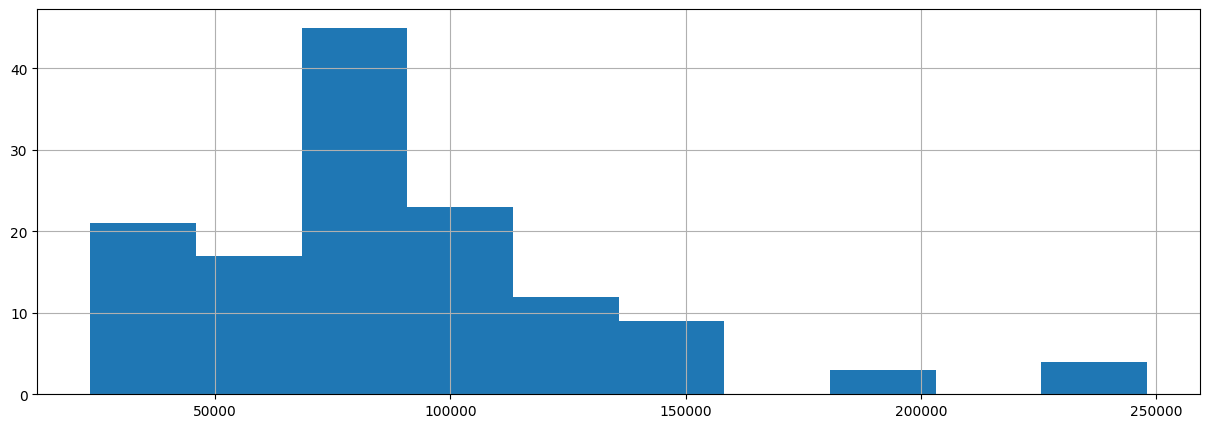

In [222]:
plt.figure(figsize=(15,5))
df['price_rupiah'].hist()

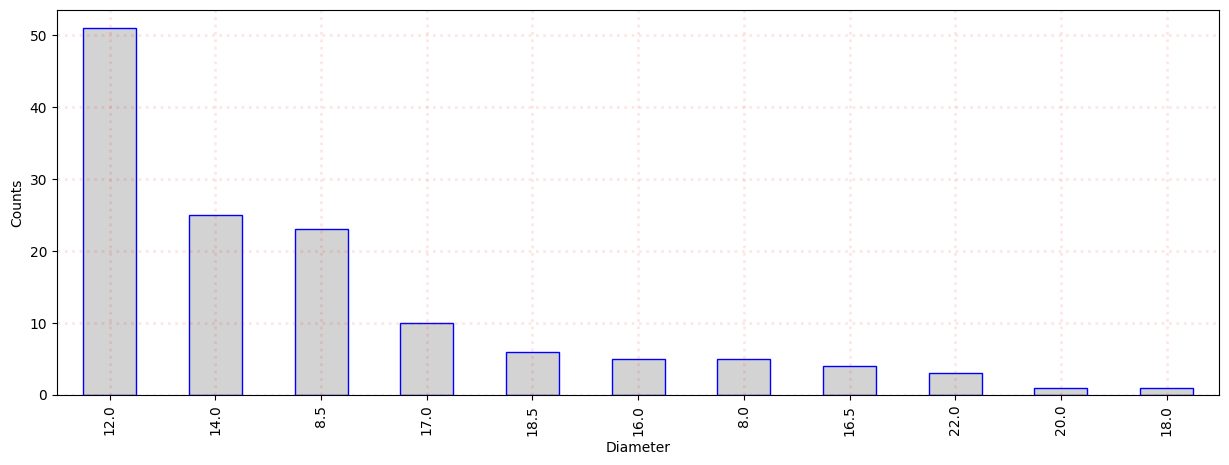

In [223]:
plt.figure(figsize=(15,5))
df['diameter'].value_counts().plot.bar(color='lightgrey', edgecolor='blue')
plt.xlabel('Diameter')
plt.ylabel('Counts')
plt.grid(color='red',alpha=0.1,linestyle='dotted',linewidth=2)
plt.show()

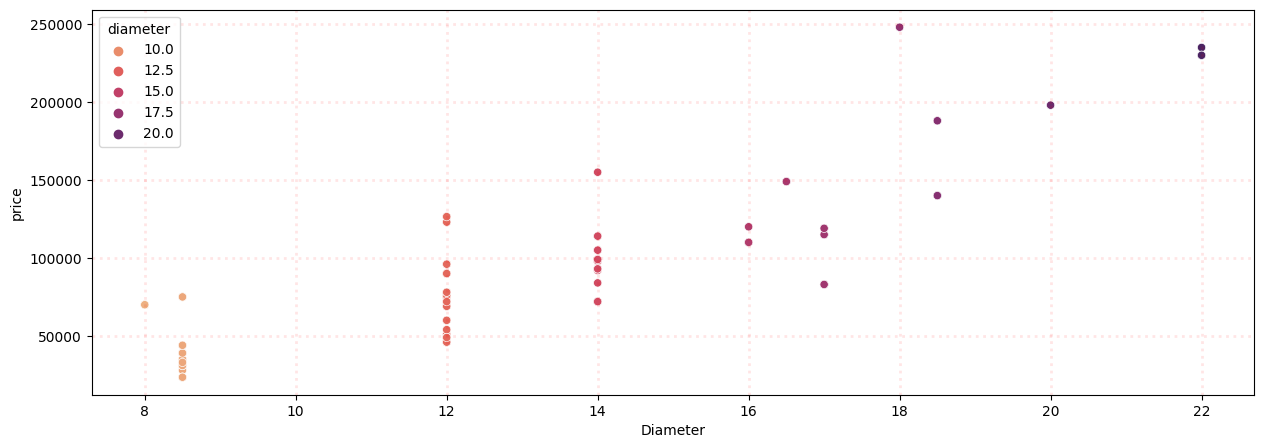

In [224]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=df, x='diameter', y='price_rupiah', hue='diameter', palette='flare')
plt.xlabel('Diameter')
plt.ylabel('price')
plt.grid(color='red',alpha=0.1,linestyle='dotted',linewidth=2)
plt.show()

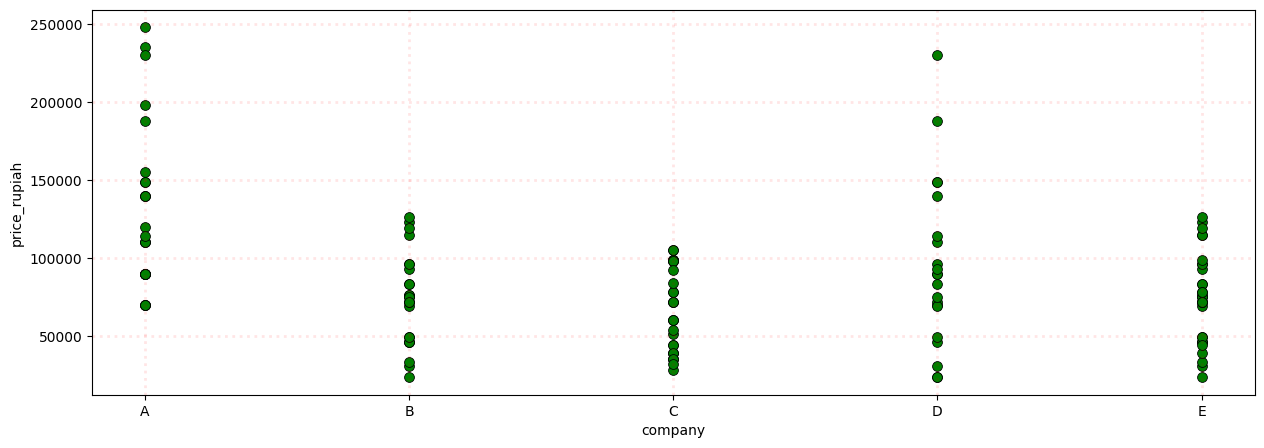

In [225]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=df, x='company', y='price_rupiah', s=50, color='green',edgecolor='k')
plt.grid(color='red',alpha=0.1,linestyle='dotted',linewidth=2)
plt.show()

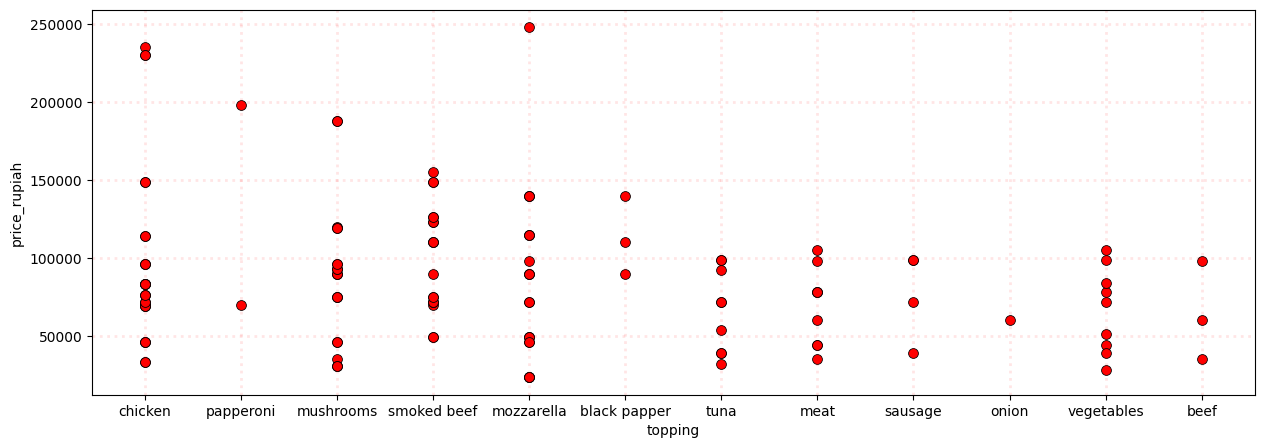

In [226]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=df, x='topping', y='price_rupiah', s=50, color='red',edgecolor='k')
plt.grid(color='red',alpha=0.1,linestyle='dotted',linewidth=2)
plt.show()

In [227]:
df.rename(columns={"price_rupiah": "price"}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134 entries, 0 to 135
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       134 non-null    object 
 1   price         134 non-null    int64  
 2   diameter      134 non-null    float64
 3   topping       134 non-null    object 
 4   variant       134 non-null    object 
 5   size          134 non-null    object 
 6   extra_sauce   134 non-null    object 
 7   extra_cheese  134 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 9.4+ KB


In [228]:
mean_price = df['price'].groupby(df['diameter']).mean()
print(mean_price)

diameter
8.0      70000.000000
8.5      37217.391304
12.0     74725.490196
14.0     93640.000000
16.0    112000.000000
16.5    149000.000000
17.0     99800.000000
18.0    248000.000000
18.5    156000.000000
20.0    198000.000000
22.0    231666.666667
Name: price, dtype: float64


In [229]:
df.columns

Index(['company', 'price', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese'],
      dtype='object')

In [230]:
EN = LabelEncoder()
df['company'] = EN.fit_transform(df['company'])
df['company'] = EN.fit_transform(df['company'])
df['topping'] = EN.fit_transform(df['topping'])
df['variant'] = EN.fit_transform(df['variant'])
df['size'] = EN.fit_transform(df['size'])
df['extra_sauce'] = EN.fit_transform(df['extra_sauce'])
df['extra_cheese'] = EN.fit_transform(df['extra_cheese'])
df.sample(10)

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese
118,4,33000,8.5,2,4,5,0,1
86,3,70000,8.0,2,13,4,1,1
108,4,72000,14.0,9,4,2,1,0
79,2,60000,12.0,0,2,3,1,0
77,2,99000,14.0,11,19,2,0,0
12,0,110000,16.0,1,18,1,1,1
110,4,83000,17.0,2,15,0,0,1
44,1,119000,17.0,5,15,0,1,0
101,3,31000,8.5,5,4,5,1,1
107,4,46000,12.0,2,4,3,1,0


In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134 entries, 0 to 135
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       134 non-null    int64  
 1   price         134 non-null    int64  
 2   diameter      134 non-null    float64
 3   topping       134 non-null    int64  
 4   variant       134 non-null    int64  
 5   size          134 non-null    int64  
 6   extra_sauce   134 non-null    int64  
 7   extra_cheese  134 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 9.4 KB


<ipython-input-232-0e82efb3b82f>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(),dtype=np.bool))


Text(0.5, 1.0, 'Correlation Heatmap')

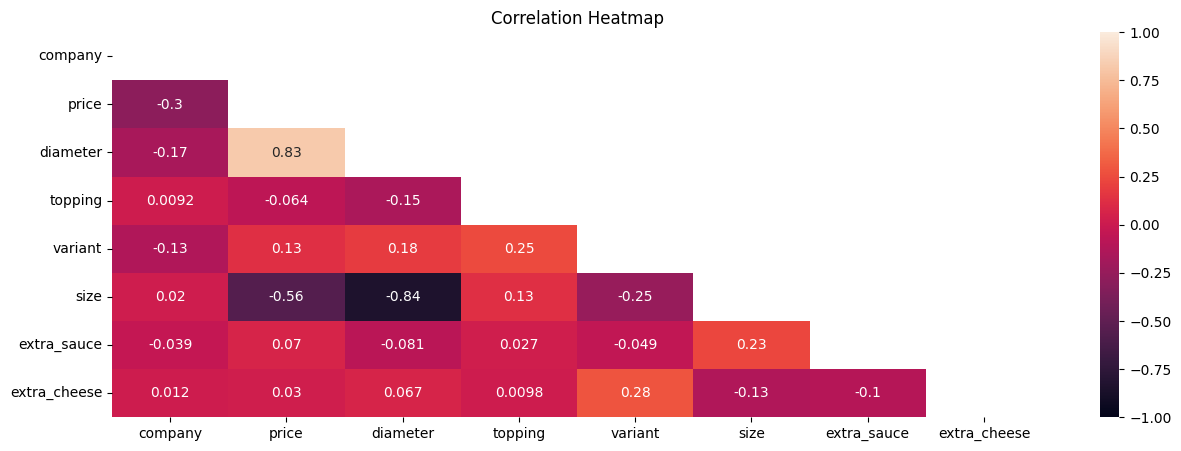

In [232]:
plt.figure(figsize=(15,5))
mask = np.triu(np.ones_like(df.corr(),dtype=np.bool))
heatmap = sns.heatmap(df.corr(),vmin= -1,vmax=1, annot=True,mask=mask)
heatmap.set_title('Correlation Heatmap')

# **Split Data**

In [233]:
x= df.drop(columns=['price'])
y=df['price']

# **Building Model**

In [234]:
reg= LinearRegression()

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

print('Shape of x train : ',x_train.shape)
print('Shape of y train : ',y_train.shape)

print('Shape of x test : ',x_test.shape)
print('Shape of y test : ',y_test.shape)

Shape of x train :  (107, 7)
Shape of y train :  (107,)
Shape of x test :  (27, 7)
Shape of y test :  (27,)


In [235]:
reg = reg.fit(x_train,y_train)
print(reg)

LinearRegression()


In [236]:
y_pred = reg.predict(x_test)
print(y_pred)

[ 44236.5881086  121155.55333127  35239.77833711  69936.02832817
 102094.72624662  81966.58753961  71531.10746518  72134.67682416
  29376.3996177  105605.69372009 109615.82125215  91260.47606712
  96585.69751652 108106.90642394  88881.01642187  35312.9328843
  82446.871196    87149.79047767  91521.35862945  82802.6246411
  39172.24922152  60490.31729621  99745.2665558   78807.01850034
 186254.37024781  67664.40190025  87177.01737262]


In [237]:
y_pred = np.round_(y_pred, decimals = 2)
print('Rounded Values', y_pred)

Rounded Values [ 44236.59 121155.55  35239.78  69936.03 102094.73  81966.59  71531.11
  72134.68  29376.4  105605.69 109615.82  91260.48  96585.7  108106.91
  88881.02  35312.93  82446.87  87149.79  91521.36  82802.62  39172.25
  60490.32  99745.27  78807.02 186254.37  67664.4   87177.02]


In [238]:
print(reg.intercept_)

-132413.62840722222


In [239]:
print(reg.coef_)

[-4010.12753206 14848.69625284   480.46027164  -101.82643111
  9772.9066609   7174.08460404  2198.47188073]


In [240]:
coeff_df = pd.DataFrame(reg.coef_, x.columns, columns=["Coefficient"])
coeff_df

,Coefficient
company,-4010.127532
diameter,14848.696253
topping,480.460272
variant,-101.826431
size,9772.906661
extra_sauce,7174.084604
extra_cheese,2198.471881


In [241]:
df_test_set = x_test
df_test_set = df_test_set.join(y_test)
df_test_set['PREDICTED PRICE'] = y_pred
df_test_set.sample(5)

,company,diameter,topping,variant,size,extra_sauce,extra_cheese,price,PREDICTED PRICE
10,0,12.0,9,3,4,0,0,90000,88881.02
118,4,8.5,2,4,5,0,1,33000,29376.40
71,2,14.0,11,10,2,0,0,105000,91260.48
128,4,17.0,2,15,0,0,1,83000,105605.69
130,4,8.5,10,16,5,1,1,39000,39172.25


# **Scatter Plot Actual Price vs Predicted Price**

Text(0, 0.5, 'Predicted Price')

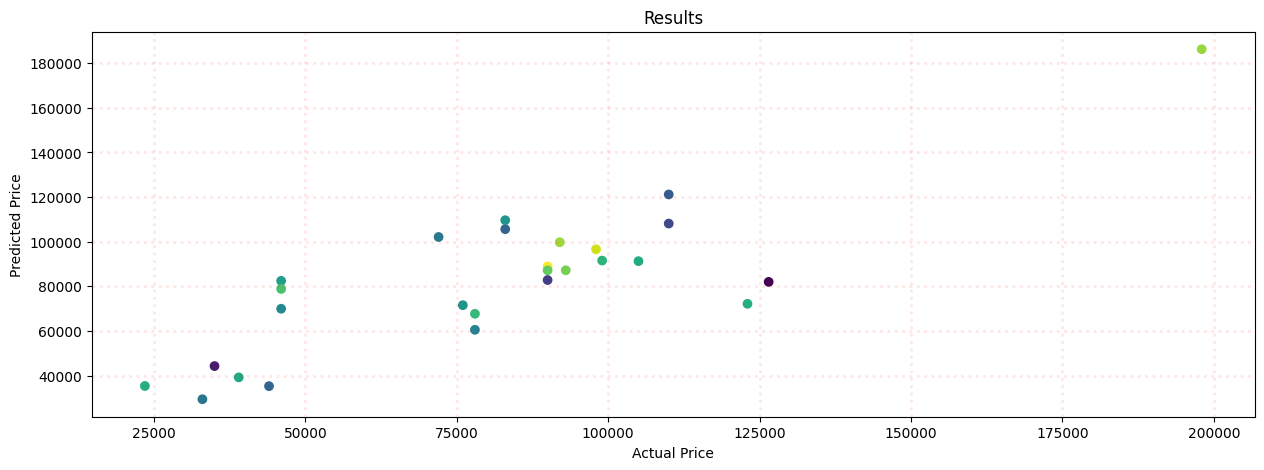

In [242]:
plt.figure(figsize=(15,5))
colors = np.random.rand(27)
plt.scatter(y_test,y_pred, c = colors)
plt.grid(color='red',alpha=0.1, linestyle='dotted',linewidth=2)
plt.title("Results")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

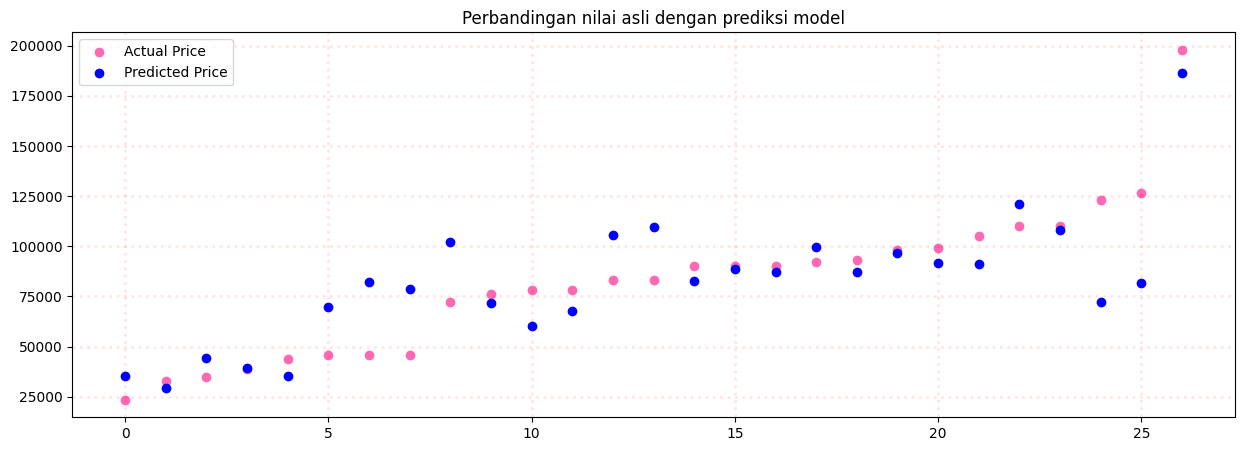

In [243]:
plt.figure(figsize=(15,5))
y_sorted = np.sort(y_test.tolist())
y_sorted_index = np.argsort(y_test.tolist())

predictions_sorted = y_pred[y_sorted_index]

plt.scatter(np.arange(0,len(y_sorted)),y_sorted,label='Actual Price', color = 'hotpink')
plt.scatter(np.arange(0,len(y_sorted)),predictions_sorted,label='Predicted Price', color = 'blue')
plt.grid(color='red',alpha=0.1, linestyle='dotted',linewidth=2)
plt.title("Perbandingan nilai asli dengan prediksi model")
plt.legend()

In [244]:
output = pd.DataFrame({'Actual Price' : y_test, 'Predicted Price': y_pred})
output = output.sort_values(by = 'Actual Price')
output

,Actual Price,Predicted Price
106,23500,35312.93
118,33000,29376.40
66,35000,44236.59
130,39000,39172.25
133,44000,35239.78
119,46000,69936.03
47,46000,82446.87
28,46000,78807.02
29,72000,102094.73
42,76000,71531.11


In [245]:
print("Training Model : ", reg.score(x_train, y_train))
print("Testing Model : ", reg.score(x_test, y_test))

Training Model :  0.7721463215816411
Testing Model :  0.6881014897839817


In [246]:
print('R2 Score : ', metrics.r2_score(y_test, y_pred))

R2 Score :  0.6881015104895816


In [247]:
output.to_csv('/content/drive/MyDrive/Colab Notebooks/Learn/Pizza Price Pred.csv', index=False)